In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('subway.xlsx')

In [4]:
df.head()

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
0,2018-01-01,1호선,150,서울역,승차,373,318,365,785,1047,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
1,2018-01-01,1호선,150,서울역,하차,205,1040,872,984,1650,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
2,2018-01-01,1호선,151,시청,승차,87,105,124,197,291,...,1027,1102,1278,1163,1032,975,553,214,9,12298
3,2018-01-01,1호선,151,시청,하차,47,294,497,1017,673,...,781,702,552,388,308,236,160,100,39,10945
4,2018-01-01,1호선,152,종각,승차,604,399,191,250,370,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621


In [15]:
name=df["역명"].value_counts()

In [40]:
seouldf=df.loc[df["역명"]== "서울대입구(관악구청)" ,:]
seouldf.head(2)

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
74,2018-01-01,2호선,228,서울대입구(관악구청),승차,509,569,589,860,1097,...,1882,1906,1648,1285,1132,1117,1012,501,5,23774
75,2018-01-01,2호선,228,서울대입구(관악구청),하차,180,705,410,542,1004,...,1893,2154,2250,2182,1971,2113,2054,1185,511,27131


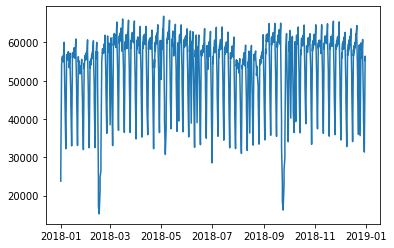

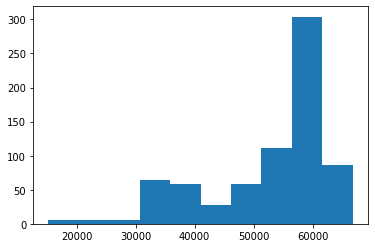

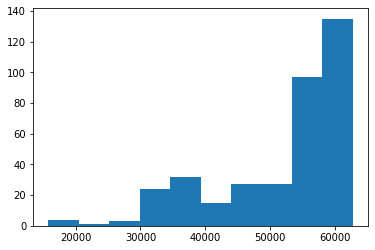

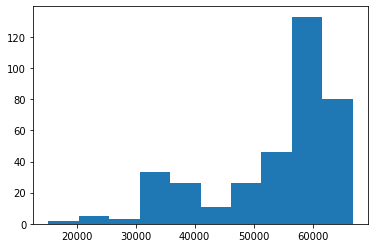

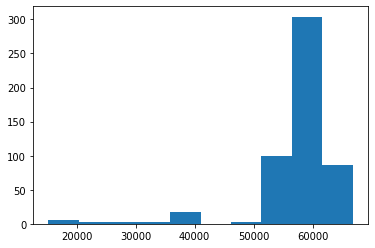

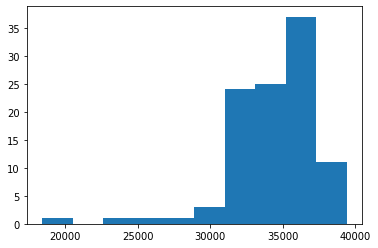

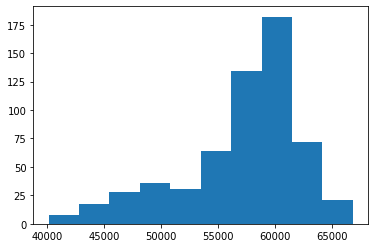

In [53]:
timelable = seouldf.columns[5:-2]

plt.plot(seouldf['날짜'], seouldf['합 계'])
plt.show()
plt.hist(seouldf['합 계'])
plt.show()
plt.hist(seouldf.loc[seouldf['구분']=='하차','합 계'])
plt.show()
plt.hist(seouldf.loc[seouldf['구분']=='승차','합 계'])
plt.show()


plt.hist(seouldf.loc[seouldf['날짜'].dt.weekday < 5,'합 계'])
plt.show()
plt.hist(seouldf.loc[seouldf['날짜'].dt.weekday > 5,'합 계'])
plt.show()
plt.hist(seouldf.loc[seouldf['합 계'] > 40000,'합 계'])
plt.show()

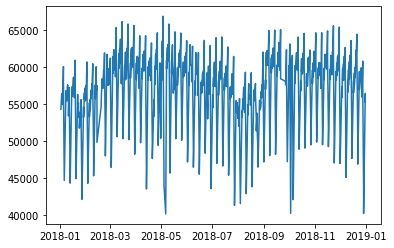

In [56]:
over4m=seouldf.loc[seouldf['합 계'] > 40000]
plt.plot(over4m['날짜'], over4m['합 계'])
# weekday는 40000면이하로 움직임 , 휴일를 제거하는 기준으로 40000을 사용함.

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


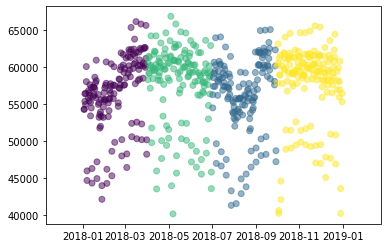

In [73]:

from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
# create model and prediction
over4m["index1"] = over4m.index

feature = over4m[['index1','합 계']]


model = KMeans(n_clusters=4,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

plt.scatter(over4m['날짜'],over4m['합 계'],c=predict['predict'],alpha=0.5)





C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


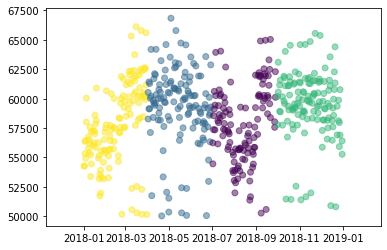

In [75]:
over5m=seouldf.loc[seouldf['합 계'] > 50000]
over5m["index1"] = over5m.index

feature = over5m[['index1','합 계']]


model = KMeans(n_clusters=4,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

plt.scatter(over5m['날짜'],over5m['합 계'],c=predict['predict'],alpha=0.5)